In [1]:
"""
Unit and regression test for the transformato package.
"""

# Import package, test suite, and other packages as needed
import logging
import os
import sys
import warnings

import pytest

# read in specific topology with parameters
from transformato import (
    IntermediateStateFactory,
    ProposeMutationRoute,
    SystemStructure,
    load_config_yaml,
)
from transformato.mutate import perform_mutations
from transformato.tests.paths import get_test_output_dir
from transformato_testsystems.testsystems import get_testsystems_dir

from transformato import load_config_yaml, SystemStructure, IntermediateStateFactory, ProposeMutationRoute
from transformato.mutate import perform_mutations
from IPython.display import SVG
import glob
import subprocess
import warnings
import os

import logging
logging.basicConfig(level=logging.DEBUG)

warnings.filterwarnings("ignore", module='parmed')

In [2]:
# conf = f"/site/raid4/asmund/ppar/rbfe/2nd_round/data/config/cpd31_cpd25.yaml"
# configuration = load_config_yaml(
#     config=conf,
#     input_dir="/site/raid4/asmund/ppar/rbfe/2nd_round/data",
#     output_dir=get_test_output_dir(),
# )  # NOTE: for preprocessing input_dir is the output dir


In [3]:
conf = f"/scratch/data/johannes/miniconda3/envs/fep/lib/python3.9/site-packages/transformato_testsystems/data//config/ppar-cpd31_cpd25.yaml"
configuration = load_config_yaml(
    config=conf, input_dir="/scratch/data/johannes/miniconda3/envs/fep/lib/python3.9/site-packages/transformato_testsystems/data/", output_dir=get_test_output_dir()
)

Workload-Manager for output files set to slurm


In [4]:
s1 = SystemStructure(configuration, "structure1")
s2 = SystemStructure(configuration, "structure2")
s1_to_s2 = ProposeMutationRoute(s1, s2)

[system.py:179 - _read_parameters()] Custom ligand parameters are not present in /scratch/data/johannes/miniconda3/envs/fep/lib/python3.9/site-packages/transformato_testsystems/data/ppar-cpd31/waterbox/dy6/dy6.rtf
[system.py:179 - _read_parameters()] Custom ligand parameters are not present in /scratch/data/johannes/miniconda3/envs/fep/lib/python3.9/site-packages/transformato_testsystems/data/ppar-cpd31/waterbox/dy6/dy6.prm
[system.py:188 - _read_parameters()] CGenFF version: * CHARMM General Force Field (CGenFF) program version 2.5.1
[system.py:179 - _read_parameters()] Custom ligand parameters are not present in /scratch/data/johannes/miniconda3/envs/fep/lib/python3.9/site-packages/transformato_testsystems/data/ppar-cpd31/complex/dy6/dy6.rtf
[system.py:179 - _read_parameters()] Custom ligand parameters are not present in /scratch/data/johannes/miniconda3/envs/fep/lib/python3.9/site-packages/transformato_testsystems/data/ppar-cpd31/complex/dy6/dy6.prm
[system.py:188 - _read_parameters

## Propose a route from structure1 and structure2 to a commen core that has the same elements, but may differ in atom types, bonded parameters and charges. The commen core is highlighted in red on both structures.

[mutate.py:975 - _find_mcs()] MCS starting ...


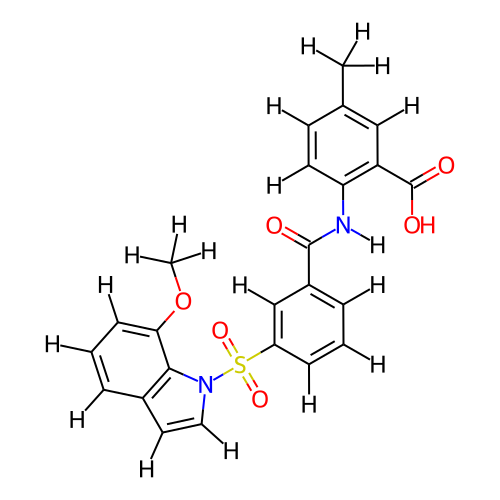

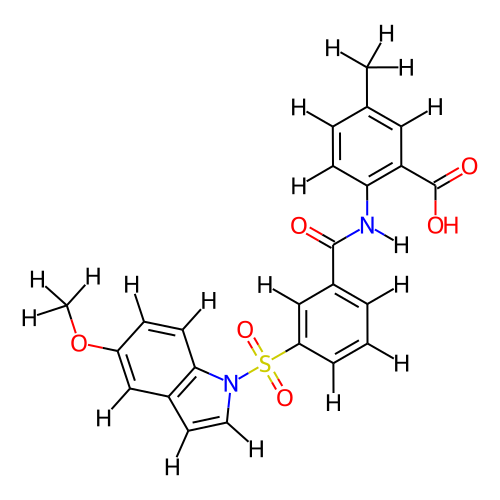

In [5]:
s1_to_s2.propose_common_core()

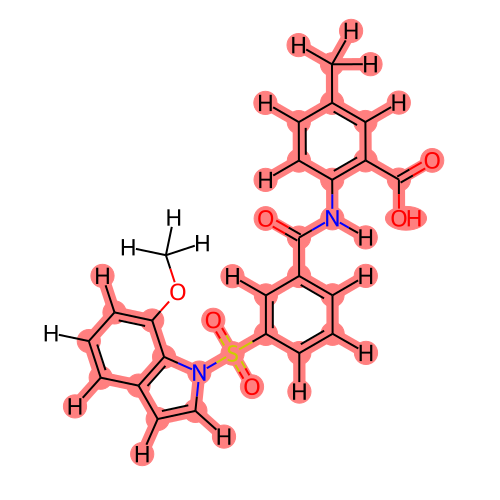

In [6]:
SVG(s1_to_s2.show_common_core_on_mol1())

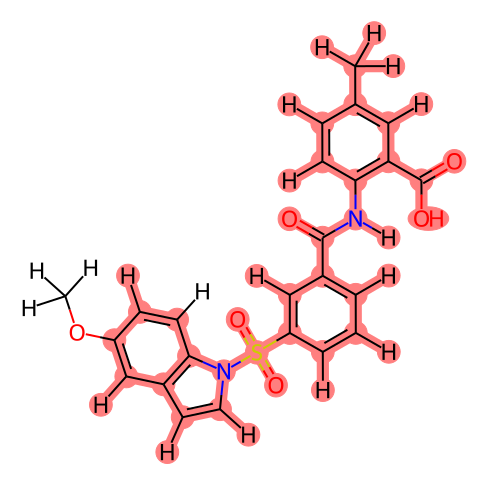

In [7]:
SVG(s1_to_s2.show_common_core_on_mol2())

In [8]:
s1_to_s2.finish_common_core()

[mutate.py:1418 - _find_terminal_atom()] Terminal dummy atoms: [33, 31]
[mutate.py:1419 - _find_terminal_atom()] Terminal real atoms: [19, 12]
[mutate.py:1418 - _find_terminal_atom()] Terminal dummy atoms: [40, 1]
[mutate.py:1419 - _find_terminal_atom()] Terminal real atoms: [21, 14]
[mutate.py:459 - _set_common_core_parameters()] Dummy regions connect on the same terminal atoms. cc1: 12 : cc2: 14
[mutate.py:459 - _set_common_core_parameters()] Dummy regions connect on the same terminal atoms. cc1: 19 : cc2: 21
[mutate.py:686 - finish_common_core()] Find connected dummy regions
[routes.py:117 - _calculate_order_of_LJ_mutations_new()] Final mutation route:
[routes.py:118 - _calculate_order_of_LJ_mutations_new()] [33]
[routes.py:117 - _calculate_order_of_LJ_mutations_new()] Final mutation route:
[routes.py:118 - _calculate_order_of_LJ_mutations_new()] [51, 50, 49, 32, 31]
[routes.py:117 - _calculate_order_of_LJ_mutations_new()] Final mutation route:
[routes.py:118 - _calculate_order_of_L

Scaling charge on: [31, 32, 33, 49, 50, 51]
Scaling charge on: [0, 1, 40, 49, 50, 51]


In [21]:
s1_to_s2.graphs["m1"]


In [19]:
assert s1_to_s2.dummy_region_cc1.lj_default == [31, 33]
assert s1_to_s2.dummy_region_cc2.lj_default == [40, 1]
assert s1_to_s2.dummy_region_cc2.connected_dummy_regions == [[49, 50, 51, 0, 1], [40]]
assert s1_to_s2.dummy_region_cc1.connected_dummy_regions == [[33], [51, 50, 49, 32, 31]]

assert s1_to_s2.get_idx_not_in_common_core_for_mol1() == [31, 32, 33, 49, 50, 51]

assert (
    len(s1_to_s2.get_common_core_idx_mol1())
    == len(s1_to_s2.get_common_core_idx_mol2())
    == 46
)

In [22]:
mutation_list = s1_to_s2.generate_mutations_to_common_core_for_mol1()

[mutate.py:1451 - _mutate_to_common_core()] Terminal dummy atoms: [33, 31]
[mutate.py:1467 - _mutate_to_common_core()] Will be decoupled: Idx:31 Element:O1
[mutate.py:1467 - _mutate_to_common_core()] Will be decoupled: Idx:32 Element:C1
[mutate.py:1467 - _mutate_to_common_core()] Will be decoupled: Idx:33 Element:H1
[mutate.py:1467 - _mutate_to_common_core()] Will be decoupled: Idx:49 Element:H2
[mutate.py:1467 - _mutate_to_common_core()] Will be decoupled: Idx:50 Element:H3
[mutate.py:1467 - _mutate_to_common_core()] Will be decoupled: Idx:51 Element:H4
[mutate.py:1329 - _transform_common_core()] ##############################
[mutate.py:1330 - _transform_common_core()] ##############################
[mutate.py:1331 - _transform_common_core()] Transform common core
[mutate.py:1332 - _transform_common_core()] ##############################
[mutate.py:1333 - _transform_common_core()] ##############################
[mutate.py:1347 - _transform_common_core()] #############################

CC Struc1: ['C01', 'C29', 'C26', 'C24', 'C23', 'C25', 'C28', 'N21', 'C18', 'C14', 'C10', 'C5', 'S2', 'N1', 'C4', 'C9', 'C12', 'C8', 'C13', 'C17', 'C20', 'C16', 'O7', 'O6', 'C11', 'C15', 'C19', 'O22', 'C27', 'O30', 'O31', 'H03', 'H04', 'H05', 'H17', 'H16', 'H18', 'H15', 'H07', 'H01', 'H02', 'H12', 'H11', 'H08', 'H10', 'H13', 'O1', 'H1']
CC Struc2: ['C01', 'C29', 'C26', 'C24', 'C23', 'C25', 'C28', 'N21', 'C18', 'C14', 'C10', 'C5', 'S2', 'N1', 'C4', 'C9', 'C12', 'C8', 'C13', 'C17', 'C20', 'C16', 'O7', 'O6', 'C11', 'C15', 'C19', 'O22', 'C27', 'O30', 'O31', 'H03', 'H04', 'H05', 'H17', 'H16', 'H18', 'H15', 'H07', 'H01', 'H02', 'H12', 'H11', 'H08', 'H10', 'H13', 'H09', 'O01']


In [39]:
mutation_list

defaultdict(list,
            {'charge': [MutationDefinition(atoms_to_be_mutated=[31, 32, 33, 49, 50, 51], common_core=[0, 28, 25, 23, 22, 24, 27, 20, 17, 13, 9, 4, 2, 1, 3, 8, 11, 7, 12, 16, 19, 15, 6, 5, 10, 14, 18, 21, 26, 29, 30, 36, 37, 38, 47, 46, 48, 45, 39, 34, 35, 43, 42, 40, 41, 44], dummy_region=DummyRegion(mol_name='m1', match_termin_real_and_dummy_atoms=defaultdict(<class 'set'>, {19: {33}, 12: {31}}), connected_dummy_regions=[[33], [51, 50, 49, 32, 31]], tlc='DY6', lj_default=[31, 33]), vdw_atom_idx=[], steric_mutation_to_default=False)],
             'hydrogen-lj': [MutationDefinition(atoms_to_be_mutated=[31, 32, 33, 49, 50, 51], common_core=[0, 28, 25, 23, 22, 24, 27, 20, 17, 13, 9, 4, 2, 1, 3, 8, 11, 7, 12, 16, 19, 15, 6, 5, 10, 14, 18, 21, 26, 29, 30, 36, 37, 38, 47, 46, 48, 45, 39, 34, 35, 43, 42, 40, 41, 44], dummy_region=DummyRegion(mol_name='m1', match_termin_real_and_dummy_atoms=defaultdict(<class 'set'>, {19: {33}, 12: {31}}), connected_dummy_regions=[[33], [51,

Generate the mutation list that is necessary to transform structure1 to the common core.
The intermediate states that are generated are located in different directories and can be run independently. The output_path variable defines where these directories are located.

In [ ]:
# generate the mutation list for the original
mutation_list = s1_to_s2.generate_mutations_to_common_core_for_mol1()
i = IntermediateStateFactory(
system=s1,
configuration=configuration,
multiple_runs=4,
)

perform_mutations(nr_of_mutation_steps_cc= 3, configuration=configuration, i=i, mutation_list=mutation_list, nr_of_mutation_steps_charge=7)

If needed, sampling for **Structure 2**

In [ ]:
# Not necessary in this case!
mutation_list = s1_to_s2.generate_mutations_to_common_core_for_mol2()
i = IntermediateStateFactory(
system=s2,
configuration=configuration,
multiple_runs=4,
)

perform_mutations(configuration=configuration, i=i, mutation_list=mutation_list, nr_of_mutation_steps_charge=3)

In [ ]:
wd = os.getcwd()
output_files = glob.glob(wd + f"/{molecule}-rbfe/*/intst*", recursive = True)

output = []
for path in sorted(output_files):
	# because path is object not string
	print(f"Start sampling for: {path}")
	exe = subprocess.Popen(["ssh", "rs02", "sbatch",f"--exclude=n0028,n0029,n0030,n0031",f"-J {molecule}", f"{str(path)}/simulation.sh", str(path)], text=True, stdout=subprocess.PIPE )
	output.append(exe.stdout.read())
	print(exe.stdout.read())

In [ ]:
#jobid = ['n '.join(list(filter(str.isdigit, item))) for item in output]
job = []
for item in output:
    id = ''.join(list(filter(str.isdigit, item)))
    job.append(id)
jobid = ':'.join(job)
print(jobid)

with open(f'{molecule}-rbfe/analysis_{molecule}.sh', 'w+') as f:
    f.write(f'#!/bin/bash \n')
    f.write(f'#SBATCH --gres=gpu \n')
    f.write(f'#SBATCH -p gpu \n')
    f.write(f'#SBATCH --job-name=A{molecule} \n')
    f.write(f'#SBATCH --output={molecule}_%j.log \n')
    f.write(f'#SBATCH -d afterany:"{jobid}"  \n')
    f.write(f' \n')
    f.write(f' source ~/miniconda3/etc/profile.d/conda.sh \n')
    f.write(f' conda activate fep \n')
    f.write(f' \n')
    f.write(f'cd {wd} \n')
    f.write(f' \n')
    f.write(f'time python {wd}/analysis.py . {input_dir} {config} > {molecule}-rbfe/analysis.out \n')

exe = subprocess.Popen(["ssh", "rs02", "sbatch", f"{wd}/{molecule}-rbfe/analysis_{molecule}.sh"], text=True, stdout=subprocess.PIPE )
output = exe.stdout.read()
print(output)